In [1]:
import glob #to read the files
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel
from scipy.interpolate import interp1d

In [2]:
sn_names=glob.glob("SN2011fe10*.dat")

In [3]:
sn_names

['SN2011fe10.dat']

In [4]:
y = []
z = []

In [5]:
file = open(sn_names[0])
lines = file.readlines()
file.close()


y = []
z = []

for line in lines:
    if line.startswith('#'): continue
    co=line.rstrip().replace('INDEF','Nan').split()

    y.append(co[0])
    z.append(co[1])


y = np.array(y, dtype=float)
z = np.array(z, dtype=float)

In [6]:
y

array([3498.94, 3500.75, 3502.55, ..., 9287.36, 9289.17, 9290.98])

<IPython.core.display.Javascript object>


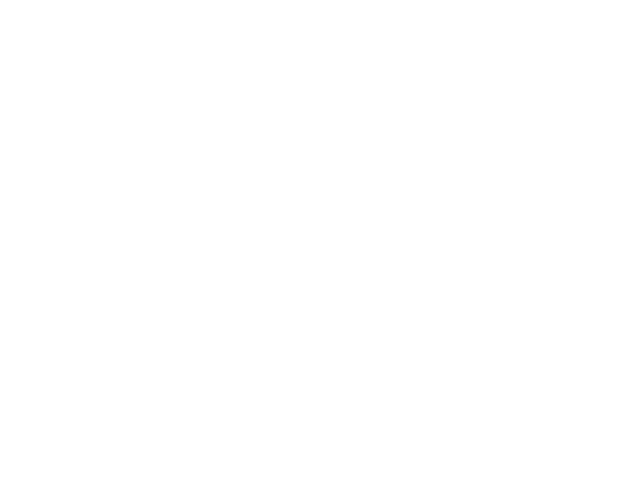

In [7]:
%matplotlib notebook
plt.plot(y, z, 'ko')
plt.show()

In [8]:
interpolation = interp1d(y, z)

In [9]:
yred = np.linspace(min(y), max(y), 500)

In [10]:
zred = interpolation(yred)

<IPython.core.display.Javascript object>


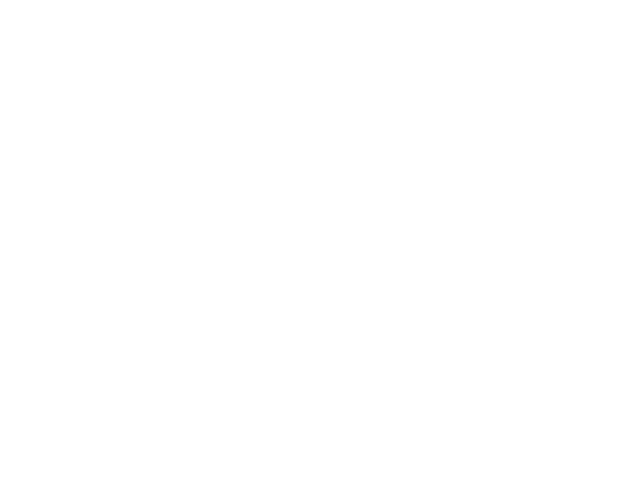

In [11]:
%matplotlib notebook
plt.plot(yred, zred, 'ko')
plt.show()

In [12]:
kernel = Matern(length_scale=1, nu=1.5) + WhiteKernel(noise_level=1)

In [13]:
zred = zred/max(zred)

In [14]:
X_ = np.linspace(2000, 9200, 500)

In [15]:
yredgp = []
for i in range(0,len(zred)):
    
    yredgp.append([yred[i]])

In [16]:
gp = GaussianProcessRegressor(kernel=kernel, alpha=0.0).fit(yredgp, zred)

y_mean, y_cov = gp.predict(X_[:, np.newaxis], return_cov=True)

<IPython.core.display.Javascript object>


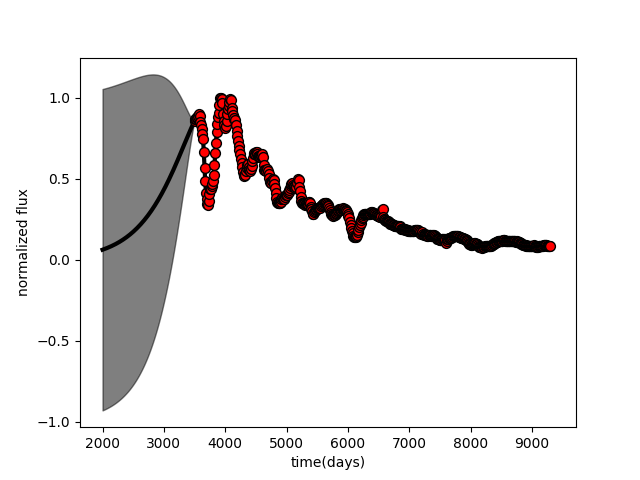

In [17]:
%matplotlib notebook

plt.fill_between(X_, y_mean - np.sqrt(np.diag(y_cov)),y_mean + np.sqrt(np.diag(y_cov)),alpha=0.5, color='k')
plt.scatter(yred, zred, c='r', s=50, zorder=10, edgecolors=(0, 0, 0))
plt.plot(X_, y_mean, 'k', lw=3, zorder=9)
#plt.xlim(-10,50)
plt.xlabel("time(days)")
plt.ylabel("normalized flux")
plt.show()